### **Desafío - Pruebas de hipótesis**

#### **`1 - Evaluar juicios de hipótesis`**

Para evaluar la pertinencia de diversas hipótesis, se te solicita discernir si es posible rechazar la hipótesis nula.

- 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se identificaron como heterosexuales. El objetivo era medir actitudes frente a la adopción homoparental. La organización encargada de procesar los datos obtuvo los siguientes resultados:

    - El 67% de los encuestados son heterosexuales se mostró a favor de la adopción homoparental, mientras que un 72% de los encuestados por activistas que se identificaron como homosexuales se mostraron a favor de la adopción homoparental.

    - Asumiendo que la hipótesis nula es que ambos porcentajes no son diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.

    - Con p-valor de 0.1183 ¿es posible rechazar la hipótesis nula en favor de la alternativa con una confianza de 95%?, ¿Cuanta es la confianza máxima con la que sería posible rechazar la hipótesis nula en favor de la alternativa con estos resultados?

$$ H_0 : \text{Porcentaje aceptación adopción homosexual = Porcentaje aceptación adopción heterosexual}$$ 
$$ H_1 : \text{Porcentaje aceptación adopción homosexual != Porcentaje aceptación adopción heterosexual}$$ 

* **p-valor** = 0.1183
* **Nivel de Confianza** = 0.95
* **Significancia** = 0.05

p-valor > significancia (0.1183>0.05)

Confianza necesaria para rechazar hipótesis nula es de=

1-0.1183 = 0.8817     =  88.17%

**`¿Es posible rechazar la hipótesis nula en favor de la alternativa con una confianza de 95%?`**

In [1]:
p_value = 0.1183
nivel_de_confianza = 0.95
alpha = 1-nivel_de_confianza

En base a los antecedentes anteriores, no es posible rechazar la hipótesis nula, dado que la significancia es menor al p-valor (p-valor > significancia (0.1183>0.05))

In [2]:
p_value < alpha

False

**`¿Cuanta es la confianza máxima con la que sería posible rechazar la hipótesis nula en favor de la alternativa con estos resultados?`**

x = confianza máxima con la que sería posible rechazar la hipótesis nula

Se rechaza la hipótesis nula cuando se cumple: 

p_value < 1 - x

In [3]:
print("despejando x el resultado sería:")
print("x < 1 - 0.1183")

despejando x el resultado sería:
x < 1 - 0.1183


In [4]:
print(f"Con un nivel de confianza de {(1-p_value)*100}% es la máxima confianza con la que se podría rechazar la hipotesis nula")

Con un nivel de confianza de 88.17% es la máxima confianza con la que se podría rechazar la hipotesis nula


#### **`2 - Importe la base de datos utilizada la sesión presencial anterior`**

- Agregue una serie de variables binarias por cada continente de la variable region.
- **Tip**: Utilice `np.where` para ello.
- De manera similar a la sesión anterior, enfóquese en las siguientes variables:
  * Apellidos desde la A hasta la N: Enfocarse en las variables `chldmort`, `adfert` y `life`.
  * Apellidos desde la N hasta la Z: Enfocarse en las variables `femlab`, `literacy` y `school`.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [6]:
df_initial = pd.read_csv('nations.csv', encoding='iso-8859-1', index_col=0)
df_initial.shape

(194, 13)

In [9]:
df_initial.head()

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


Seleccion de columnas

In [12]:
columnas_NZ = ['femlab', 'literacy', 'school']
base_cols = ['country', 'region']
df = df_initial.loc[:, base_cols + columnas_NZ]

In [13]:
df.head()

,country,region,femlab,literacy,school
1,Algeria,Africa,0.4522,72.599998,6.716667
2,Benin,Africa,0.8482,41.700001,3.100000
3,Botswana,Africa,0.8870,84.099998,8.600000
4,Burkina Faso,Africa,0.8584,23.600000,1.300000
5,Burundi,Africa,1.0344,66.599998,2.483333


Se agregan las 4 columnas con valor binario según corresponda el continente

In [14]:
df['Africa'] = np.where(df['region'] == 'Africa', 1, 0)
df['Americas'] = np.where(df['region'] == 'Americas', 1, 0)
df['Asia'] = np.where(df['region'] == 'Asia', 1, 0)
df['Europe'] = np.where(df['region'] == 'Europe', 1, 0)
df['Oceania'] = np.where(df['region'] == 'Oceania', 1, 0)

In [15]:
df.head()

,country,region,femlab,literacy,school,Africa,Americas,Asia,Europe,Oceania
1,Algeria,Africa,0.4522,72.599998,6.716667,1,0,0,0,0
2,Benin,Africa,0.8482,41.700001,3.100000,1,0,0,0,0
3,Botswana,Africa,0.8870,84.099998,8.600000,1,0,0,0,0
4,Burkina Faso,Africa,0.8584,23.600000,1.300000,1,0,0,0,0
5,Burundi,Africa,1.0344,66.599998,2.483333,1,0,0,0,0


También podemos hacerlo de la sigueinte manera:

In [ ]:
for i in df['region'].unique():
    df[i] = np.where(df['region'] == i, 1,0)

#### **`3 - Implemente una función de prueba de hipótesis a mano`**

- La función debe ingresar los siguientes argumentos:

    - `df`: La tabla de datos.
    - `variable`: La variable a analizar.
    - `binarize`: El indicador binario a utilizar.

- Tips:

    - Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos con `dropna()`.
    - Implemente `ttest_ind` de `scipy.stats` y guarde el valor `t` y `pval`.
    - Reporte las medias para cada grupo (0 y 1).
    - Reporte la diferencia de entre las medias.
    - Reporte los valores t y p

**`Primera forma`**

In [30]:
values_one = df.query('Africa == 1')['school'].dropna()
values_one.head()

1    6.716667
2    3.100000
3    8.600000
4    1.300000
5    2.483333
Name: school, dtype: float64

In [16]:
# Funcion hipotesis: recibe un dataframe, la variable a analizar y la columna binarizada
def hipotesis(df, variable, binarize): 
    tmp = df 
    # separamos datos por indicador
    tmp['binarize'] = np.where(tmp['region'] == binarize, 1, 0)
    # separamos datos en variable indicada de acuerdo a 0 y 1
    values_one = tmp.query('binarize == 1')[variable].dropna()
    values_null = tmp.query('binarize == 0')[variable].dropna()
    # obtenemos estadisticas
    stats_ = stats.ttest_ind(values_one, values_null)
    print(f'Datos de {binarize} y variable {variable}')
    print()
    print(f'La media para {binarize} es {round(values_one.mean(), 3)}, y para el resto del mundo {round(values_null.mean(), 3)}')
    print(f'La diferencia entre medias es: {round(values_one.mean() - values_null.mean(), 3)}')
    print(f'Valor t: {round(stats_[0], 3)}')
    print(f'Valor p: {round(stats_[1], 3)}')
    print()

In [22]:
hipotesis(df,'school','Americas')

Datos de Americas y variable school

La media para Americas es 8.073, y para el resto del mundo 7.319
La diferencia entre medias es: 0.754
Valor t: 1.363
Valor p: 0.175



**`Segunda forma`**

In [32]:
def funcion3(df, variable, binarize):
    #Con Indicador Binario se refiere a la columna binaria a utilizar para comprar con el resto de las regiones,
    #Es decir, se refiere a la región a comparar con el resto de regiones.
    
    #Separado en 2 grupos para tener 2 set de datos segmentados según la variable binarize elegida
    grupo0 = df[df[binarize] == 0][variable].dropna()
    grupo1 = df[df[binarize] == 1][variable].dropna()
    
    #Hago t_test y guardo los valores
    t , pval = stats.ttest_ind(grupo0,grupo1) #por defecto compara medias y hace ttest con 2 colas
    
    #reporto las medias y la diferencia entre ellas
    print(f"La media para el grupo 0 es {np.mean(grupo0)}")
    print(f"La media para el grupo 1 es {np.mean(grupo1)}")
    print(f"La diferencia entre las medias es de : {abs(np.mean(grupo0)-np.mean(grupo1))}")
    print("*****************")
    
    #reporte valores t y p
    print(f"El valor t del test es {t}")
    print(f"El valor pvalue del test es {pval}")

funcion3(df,'school','Americas')

La media para el grupo 0 es 7.318845326604408
La media para el grupo 1 es 8.072857080187116
La diferencia entre las medias es de : 0.7540117535827084
*****************
El valor t del test es -1.362827174571195
El valor pvalue del test es 0.17458464986808925


#### **`4 - Implemente una función que grafique los histogramas para ambas muestras`**

Genere una función que devuelva un gráfico donde visualice los dos histogramas cuando la variable es 1 y 0, respectivamente
    
- Tips: Refactorize la función incluyendo el método `hist` de `matplotlib.pyplot`. Incluya los argumentos `alpha` y `label`.
-  Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada continente, y posteriormente grafique. Concluya con los principales resultados al respecto.

In [55]:
def hist_plot(df, variable, binarize):
    tmp = df
    # separamos datos por indicador
    tmp['binarize'] = np.where(tmp['region'] == binarize, 1, 0)
    # separamos datos en variable indicada de acuerdo a 0 y 1
    values_one = tmp.query('binarize == 1')[variable].dropna()
    values_null = tmp.query('binarize == 0')[variable].dropna()
    # graficamos
    label = [binarize, 'Resto del mundo']
    plt.hist(values_one, alpha=.5, color='red', label=label[0])
    plt.axvline(np.mean(values_one), color = 'red', label = f"media {label[0]} ({round(np.mean(values_one),2)})")
    plt.hist(values_null, alpha=.5, color='grey', label=label[1])   
    plt.axvline(np.mean(values_null), color = 'black', label = f"media {label[1]} ({round(np.mean(values_null),2)})")     
    plt.title(f'Ocurrencias variable {variable} en región {binarize}')
    plt.legend()

`COMENTARIO`: EL promedio de años escolaridad para el caso de America es de 8 años, mientras que para el resto de los continentes es de 7, es decir está sobre la media.

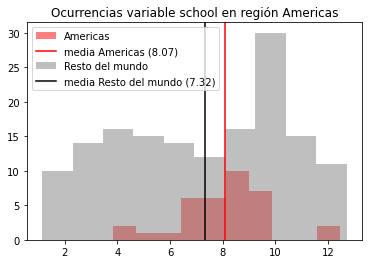

In [56]:
hist_plot(df, 'school', 'Americas')

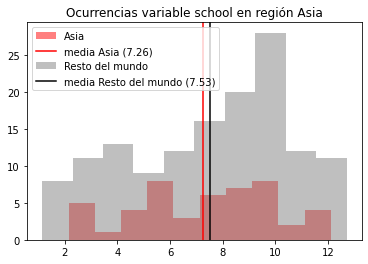

In [58]:
hist_plot(df, 'school', 'Asia')

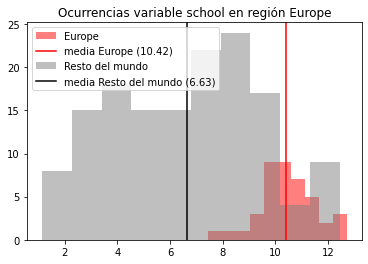

In [59]:
hist_plot(df, 'school', 'Europe')

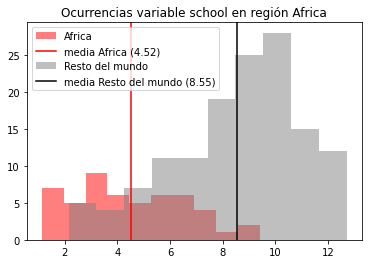

In [60]:
hist_plot(df, 'school', 'Africa')

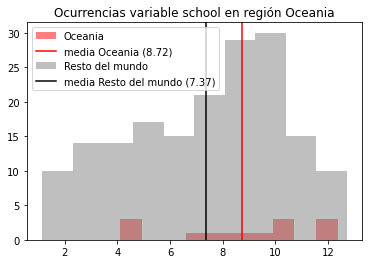

In [61]:
hist_plot(df, 'school', 'Oceania')

In [ ]:
for i in df.region.unique():
    for j in ['femlab', 'literacy', 'school']:
        hist_plot(df,j,i)